<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html model.do.txt  -->

## Level crossing and entanglement in simple  models

In order to study the importance of level avoided crossings and
entanglement, we study first a simple two-level system. Thereafter we
extend our level-crossing model to a four-level system which can be
interpreted as composed of two separate (not necesseraly identical)
subsystems.

We let our hamiltonian depend linearly on a strength parameter $z$

$$
H=H_0+\lambda H_\mathrm{I},
$$

with $\lambda \in [0,1]$, where the limits $\lambda=0$ and $\lambda=1$
represent the non-interacting (or unperturbed) and fully interacting
system, respectively.  The model is an eigenvalue problem with only
two available states, which we label $\vert 0\rangle$ and $\vert
1\rangle$, respectively. Below we will let state $\vert 0 \rangle$
represent the lowest state (often referred to as model-space state)
eigenvalue whereas state $\vert 1\rangle$ represents the eigenvalue of
the excluded space.  The non-interacting solutions to our problem are

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
       H_0\vert 0 \rangle =\epsilon_0\vert 0 \rangle,
\label{_auto1} \tag{1}
\end{equation}
$$

and

<!-- Equation labels as ordinary links -->
<div id="_auto2"></div>

$$
\begin{equation}
       H_0\vert 1\rangle =\epsilon_1\vert 1\rangle,
\label{_auto2} \tag{2}
\end{equation}
$$

with $\epsilon_0 < \epsilon_1$. We label the off-diagonal matrix
elements $X$, while $X_0=\langle 0 \vert H_I\vert 0 \rangle$ and
$X_1=\langle 1 \vert H_1\vert 1 \rangle$.  The exact eigenvalue
problem

<!-- Equation labels as ordinary links -->
<div id="_auto3"></div>

$$
\begin{equation}
\left(\begin{array}{cc}\epsilon_0+\lambda X_0 &\lambda X \\
zX &\epsilon_1+\lambda X_1 \end{array}\right)
\label{_auto3} \tag{3}
\end{equation}
$$

yields

<!-- Equation labels as ordinary links -->
<div id="eq:exact"></div>

$$
\begin{eqnarray}
\label{eq:exact} \tag{4}
     E(\lambda)=&\frac{1}{2}\left\{\epsilon_0 +\epsilon_1 +\lambda X_0
     +\lambda X_1 \pm \left(
     \epsilon_1 -\epsilon_0 +\lambda X_1-\lambda X_0\right) \right. \\ \nonumber
     & \left. \times\sqrt{1+\frac{4\lambda^2X^2}{\left(
     \epsilon_1 -\epsilon_0 +\lambda X_1-\lambda X_0\right)^2}}
     \right\}.
\end{eqnarray}
$$

In the results below we set the parameters $\epsilon_0=0$,
$\epsilon_1=4$, $X_0=-X_1=3$ and $X=0.2$.  This eigenvalue problem can
easily be rewritten in terms of the standard Pauli matrices.  The
non-interacting solutions represent our computational basis.
Pertinent to our choice of parameters, is that at $\lambda\geq 2/3$,
the lowest eigenstate is dominated by $\vert 1\rangle$ while the upper
is $\vert 0 \rangle$. At $\lambda=1$ the $\vert 0 \rangle$ mixing of
the lowest eigenvalue is $1\%$ while for $\lambda\leq 2/3$ we have a
$\vert 0 \rangle$ component of more than $90\%$.  The character of the
eigenvectors has therefore been interchanged when passing $z=2/3$. The
value of the parameter $X$ represents the strength of the coupling
between the model space and the excluded space.  The following code
computes and plots the eigenvalues.

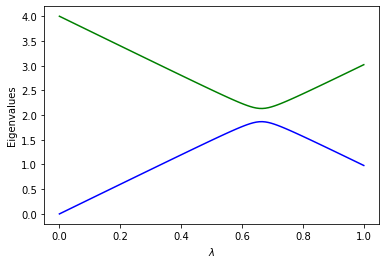

In [1]:
%matplotlib inline

%matplotlib inline

from  matplotlib import pyplot as plt
import numpy as np
dim = 2
#Setting up a tridiagonal matrix and finding eigenvectors and eigenvalues
Hamiltonian = np.zeros((dim,dim))
#number of lambda values
n = 100
lmbd = np.linspace(0.,1.0,n)
e0 = 0.0
e1 = 4.0
X = 0.20
Xp = 3.0
Eigenvalue = np.zeros((dim,n))
for i in range(n): 
    Hamiltonian[0,0] = lmbd[i]*Xp+e0
    Hamiltonian[0,1] = lmbd[i]*X
    Hamiltonian[1,0] = Hamiltonian[0,1]
    Hamiltonian[1,1] = e1+lmbd[i]*(-Xp)
    # diagonalize and obtain eigenvalues, not necessarily sorted
    EigValues, EigVectors = np.linalg.eig(Hamiltonian)
    # sort eigenvectors and eigenvalues
    permute = EigValues.argsort()
    EigValues = EigValues[permute]
    EigVectors = EigVectors[:,permute]
    Eigenvalue[0,i] = EigValues[0]
    Eigenvalue[1,i] = EigValues[1]
plt.plot(lmbd, Eigenvalue[0,:] ,'b-',lmbd, Eigenvalue[1,:],'g-',)
plt.xlabel('$\lambda$')
plt.ylabel('Eigenvalues')
plt.show()

This simple model exhibits a simple level crossing where the
composition of the final interacting states change character as we
gradually switch on the interaction.  In order to study how
entanglement relates to level crossing and the main results of our
investigations, we extend the simple two-level system to a four level
system. This system can be thought of as composed of two subsystems
$A$ and $B$. Each subsystem has computational basis states

$$
\vert 0\rangle_{\mathrm{A,B}}=\begin{bmatrix} 1 & 0\end{bmatrix}^T \hspace{1cm} \vert 1\rangle_{\mathrm{A,B}}=\begin{bmatrix} 0 & 1\end{bmatrix}^T.
$$

The subsystems could represent single particles or composite many-particle systems of a given symmetry.
This leads to the many-body computational basis states

$$
\vert 00\rangle = \vert 0\rangle_{\mathrm{A}}\otimes \vert 0\rangle_{\mathrm{B}}=\begin{bmatrix} 1 & 0 & 0 &0\end{bmatrix}^T,
$$

and

$$
\vert 10\rangle = \vert 1\rangle_{\mathrm{A}}\otimes \vert 0\rangle_{\mathrm{B}}=\begin{bmatrix} 0 & 1 & 0 &0\end{bmatrix}^T,
$$

and

$$
\vert 01\rangle = \vert 0\rangle_{\mathrm{A}}\otimes \vert 1\rangle_{\mathrm{B}}=\begin{bmatrix} 0 & 0 & 1 &0\end{bmatrix}^T,
$$

and finally

$$
\vert 11\rangle = \vert 1\rangle_{\mathrm{A}}\otimes \vert 1\rangle_{\mathrm{B}}=\begin{bmatrix} 0 & 0 & 0 &1\end{bmatrix}^T.
$$

These computational basis states define also the eigenstates of the non-interacting  Hamiltonian

$$
H_0\vert 00 \rangle = \epsilon_{00}\vert 00 \rangle,
$$

$$
H_0\vert 10 \rangle = \epsilon_{10}\vert 10 \rangle,
$$

$$
H_0\vert 01 \rangle = \epsilon_{01}\vert 01 \rangle,
$$

and

$$
H_0\vert 11 \rangle = \epsilon_{11}\vert 11 \rangle.
$$

The interacting part of the Hamiltonian $H_{\mathrm{I}}$ is given by the tensor product of two $\sigma_x$ and $\sigma_z$  matrices, respectively, that is

$$
H_{\mathrm{I}}=H_x\sigma_x\otimes\sigma_x+H_z\sigma_z\otimes\sigma_z,
$$

where $H_x$ and $H_z$ are interaction strength parameters. Our final Hamiltonian matrix is given by

$$
\boldsymbol{H}=\begin{bmatrix} \epsilon_{00}+H_z & 0 & 0 & H_x \\
                       0  & \epsilon_{10}-H_z & H_x & 0 \\
		       0 & H_x & \epsilon_{01}+H_z & 0 \\
		       H_x & 0 & 0 & \epsilon_{11} -H_z \end{bmatrix}.
$$

The four eigenstates of the above Hamiltonian matrix can in turn be used to
define density matrices. As an example, the density matrix of the
first eigenstate (lowest energy $E_0$) $\Psi_0$ is

$$
\rho_0=\left(\alpha_{00}\vert 00 \rangle\langle 00\vert+\alpha_{10}\vert 10 \rangle\langle 10\vert+\alpha_{01}\vert 01 \rangle\langle 01\vert+\alpha_{11}\vert 11 \rangle\langle 11\vert\right),
$$

where the coefficients $\alpha_{ij}$ are the eigenvector coefficients
resulting from the solution of the above eigenvalue problem.  We can
then in turn define the density matrix for the subsets $A$ or $B$ as

$$
\rho_A=\mathrm{Tr}_B(\rho_{0})=\langle 0 \vert \rho_{0} \vert 0\rangle_{B}+\langle 1 \vert \rho_{0} \vert 1\rangle_{B},
$$

or

$$
\rho_B=\mathrm{Tr}_A(\rho_{\Psi_0})=\langle 0 \vert \rho_{0} \vert 0\rangle_{A}+\langle 1 \vert \rho_{0} \vert 1\rangle_{A}.
$$

The density matrices for these subsets can be used to compute the
so-called von Neumann entropy, which is one of the possible measures
of entanglement. A pure state has entropy equal zero while entangled
state have an entropy larger than zero. The von-Neumann entropy is
defined as

$$
S(A,B)=-\mathrm{Tr}\left(\rho_{A,B}\log_2 (\rho_{A,B})\right).
$$

The example here shows the above von Neumann entropy based on the
density matrix for the lowest many-body state. We see clearly a jump
in the entropy around the point where we have a level crossing. At
interaction strenght $\lambda=0$ we have many-body states purely
defined by their computational basis states. As we switch on the
interaction strength, we obtain an increased degree of mixing and the
entropy increases till we reach the level crossing point where we see
an additional and sudden increase in entropy. Similar behaviors are
observed for the other states. The most important result from this
example is that entanglement is driven by the Hamiltonian itself and
the strength of the interaction matrix elements and the
non-interacting energies.

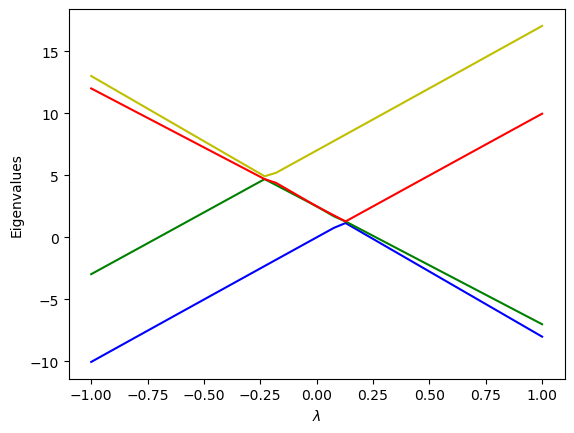

<function matplotlib.pyplot.show(close=None, block=None)>

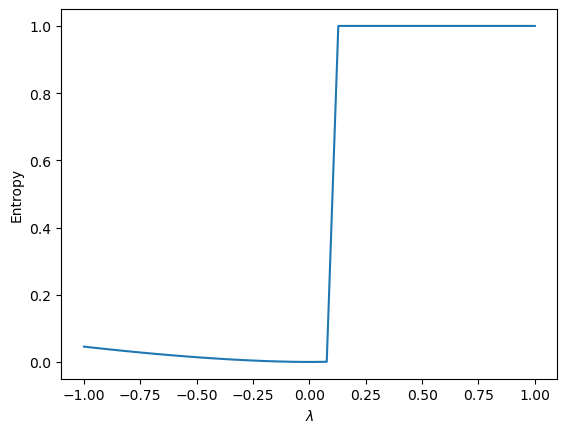

In [6]:
%matplotlib inline
from  matplotlib import pyplot as plt
import numpy as np
from scipy.linalg import logm, expm
def log2M(a): # base 2 matrix logarithm
    return logm(a)/np.log(2.0)

dim = 4
Hamiltonian = np.zeros((dim,dim))
#number of lambda values
n = 40
lmbd = np.linspace(-1.0,1.0,n)
Hx = 0.5
Hz = 10.0
# Non-diagonal part as sigma_x tensor product with sigma_x
sx = np.matrix([[0,1],[1,0]])
sx2 = Hx*np.kron(sx, sx)
# Diagonal part as sigma_z tensor product with sigma_z
sz = np.matrix([[1,0],[0,-1]])
sz2 = Hz*np.kron(sz, sz)
noninteracting = [0.0, 2.5, 2.5, 7.0]
D = np.diag(noninteracting)
Eigenvalue = np.zeros((dim,n))
Entropy = np.zeros(n)

for i in range(n): 
    Hamiltonian = lmbd[i]*(sx2+sz2)+D
    # diagonalize and obtain eigenvalues, not necessarily sorted
    EigValues, EigVectors = np.linalg.eig(Hamiltonian)
    # sort eigenvectors and eigenvalues
    permute = EigValues.argsort()
    EigValues = EigValues[permute]
    EigVectors = EigVectors[:,permute]
    # Compute density matrix for selected system state, here ground state
    DensityMatrix = np.zeros((dim,dim))
    DensityMatrix = np.outer(EigVectors[:,0],EigVectors[:,0])
    # Project down on substates and find density matrix for subsystem
    d = np.matrix([[1,0],[0,1]])
    v1 = [1.0,0.0]
    proj1 = np.kron(v1,d)
    x1 = proj1 @ DensityMatrix @ proj1.T
    v2 = [0.0,1.0]
    proj2 = np.kron(v2,d)
    x2 = proj2 @ DensityMatrix @ proj2.T
    # Total density matrix for subsystem
    total = x1+x2
    # von Neumann Entropy for subsystem 
    Entropy[i] = -np.matrix.trace(total @ log2M(total))
    # Plotting eigenvalues and entropy as functions of interaction strengths
    Eigenvalue[0,i] = EigValues[0]
    Eigenvalue[1,i] = EigValues[1]
    Eigenvalue[2,i] = EigValues[2]
    Eigenvalue[3,i] = EigValues[3]
plt.plot(lmbd, Eigenvalue[0,:] ,'b-',lmbd, Eigenvalue[1,:],'g-',)
plt.plot(lmbd, Eigenvalue[2,:] ,'r-',lmbd, Eigenvalue[3,:],'y-',)
plt.xlabel('$\lambda$')
plt.ylabel('Eigenvalues')
plt.show()
plt.plot(lmbd, Entropy)
plt.xlabel('$\lambda$')
plt.ylabel('Entropy')          
plt.show

With these introductory examples, we are now in the position where we
can start to interpret and model realistic interacting many-electron
systems in terms of the strength of the Coulomb interaction and the
shapes of the potential well. Our specific system is composed of two
potential wells with one fermion (electrons in our case) trapped in
each well.  Each potential well can sustain a certain number of bound
single-particle states and defines our subsystems $A$ and $B$. The
non-interacting part of the Hamiltonian is given by the mere addition
of the single-particle energies from each repsective well (make figure
with labels A and B and single-particle energies).

The eigenstates of the non-interacting Hamiltonian $H_0$ are given by
various computational basis states with the difference from the above
simple models that now we have more than two states in each
subsystem. The depths of the potential wells and their respective
distances can be tuned in an experimental set up. The theoretical
calculations presented here can thus serve as a tool which aids in
finding the optimal parameters in order to study entanglement in a
many-body environment.

What follows is a description of the theoretical models used to
simulate the two-electron system. More text to come.